In [185]:
"""Сереньким будут пометки#"""
"""Здравствуйте. Я Айрат. Мне много лет. Называют дата саентистом.
Постараюсь сделать проверку тестового задания интересным,
Обещаю показать красивые графики, циферки и пояснения."""
# Возможно даже будет какой то результат

'Здравствуйте. Я Айрат. Мне много лет. Называют дата саентистом.\nПостараюсь сделать проверку тестового задания интересным,\nОбещаю показать красивые графики, циферки и пояснения.'

In [186]:
"""Чистим память"""
%reset

In [187]:
"""Импортируем библиотеки"""
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [188]:
"""Смотрим что куда"""
df=pd.read_excel("Data данные.xlsx")
df.head(5)

,"date_time,cash"
0,"2018-01-09T10:11:05Z,205146.000279413"
1,"2018-01-09T13:19:10Z,152027.951692517"
2,"2018-01-09T13:22:27Z,1910.08833338259"
3,"2018-01-09T13:23:30Z,181898.214642849"
4,"2018-01-09T13:30:11Z,82061.541704419"


In [189]:
"""Закрались окаянные запятые-разделители, преобразуем все по человечески убрав запятые"""
df[['date_time', 'cash']] = pd.DataFrame(df['date_time,cash'].str.split(',').tolist())
df=df.drop(columns=['date_time,cash'])
df.head(5)

,date_time,cash
0,2018-01-09T10:11:05Z,205146.000279413
1,2018-01-09T13:19:10Z,152027.951692517
2,2018-01-09T13:22:27Z,1910.08833338259
3,2018-01-09T13:23:30Z,181898.214642849
4,2018-01-09T13:30:11Z,82061.541704419


In [190]:
"""Делаем из строки дату"""
df['date_time']=pd.to_datetime(df['date_time'])
df['date_time'].head(5)

0   2018-01-09 10:11:05+00:00
1   2018-01-09 13:19:10+00:00
2   2018-01-09 13:22:27+00:00
3   2018-01-09 13:23:30+00:00
4   2018-01-09 13:30:11+00:00
Name: date_time, dtype: datetime64[ns, UTC]

In [191]:
"""Делаем из строки число"""
df['cash']=df['cash'].astype(float).astype(int)
df['cash'].head(5)

0    205146
1    152027
2      1910
3    181898
4     82061
Name: cash, dtype: int32

'распределение не нормальное, надо что то делать'

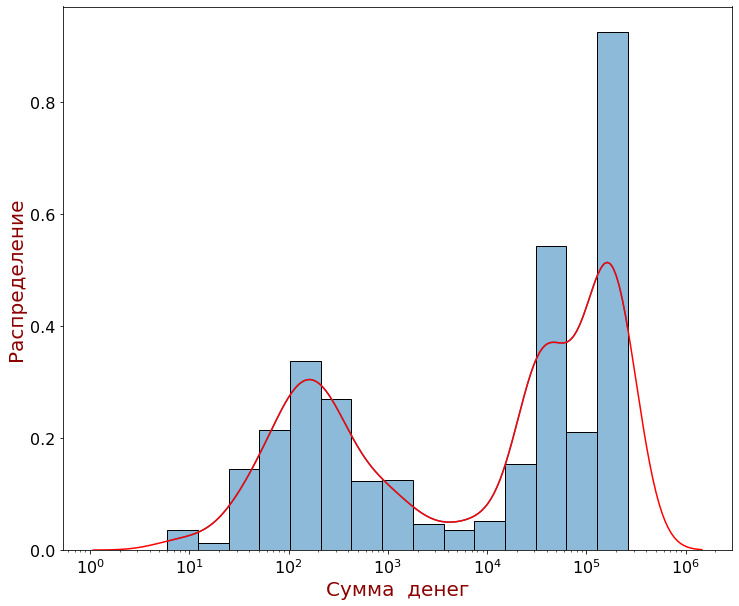

In [192]:
"""смотрим как распределена величина"""
font = {
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.figure(figsize=(12,10))
plt.xlabel("Сумма  денег", fontdict=font)
plt.ylabel("Распределение", fontdict=font)
plt.xticks(size=16)
plt.yticks(size=16)

sns.histplot(df['cash'],log_scale=10,stat='density',kde=True)
sns.kdeplot(df['cash'], color='red')
# plt.show()
"""распределение не нормальное, надо что то делать"""

In [193]:
"""Смотрим данные"""
df.describe()


,cash
count,5168.000000
mean,66863.469427
std,79348.061150
min,6.000000
25%,251.000000
50%,32652.000000
75%,156127.000000
max,261474.000000


In [194]:
"""Присваиваем индекс дата"""
df=df.set_index('date_time')
df.head(5)

,cash
date_time,
2018-01-09 10:11:05+00:00,205146
2018-01-09 13:19:10+00:00,152027
2018-01-09 13:22:27+00:00,1910
2018-01-09 13:23:30+00:00,181898
2018-01-09 13:30:11+00:00,82061


In [195]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5168 entries, 2018-01-09 10:11:05+00:00 to 2019-12-28 16:07:02+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cash    5168 non-null   int32
dtypes: int32(1)
memory usage: 60.6 KB


In [196]:
"""В наборе есть дата и время, в задании говорилось, 'прогнозирование на 14 дней',
значит время нам ни к чему"""

"В наборе есть дата и время, в задании говорилось, 'прогнозирование на 14 дней',\nзначит время нам ни к чему"

In [197]:
df['date_time']=df.index
df['date_time']

date_time
2018-01-09 10:11:05+00:00   2018-01-09 10:11:05+00:00
2018-01-09 13:19:10+00:00   2018-01-09 13:19:10+00:00
2018-01-09 13:22:27+00:00   2018-01-09 13:22:27+00:00
2018-01-09 13:23:30+00:00   2018-01-09 13:23:30+00:00
2018-01-09 13:30:11+00:00   2018-01-09 13:30:11+00:00
                                       ...           
2019-12-27 11:42:17+00:00   2019-12-27 11:42:17+00:00
2019-12-27 14:01:55+00:00   2019-12-27 14:01:55+00:00
2019-12-28 13:24:11+00:00   2019-12-28 13:24:11+00:00
2019-12-28 13:26:05+00:00   2019-12-28 13:26:05+00:00
2019-12-28 16:07:02+00:00   2019-12-28 16:07:02+00:00
Name: date_time, Length: 5168, dtype: datetime64[ns, UTC]

In [198]:
"""Извлекаем дату"""
df['date']=df['date_time'].dt.date
df['date']

date_time
2018-01-09 10:11:05+00:00    2018-01-09
2018-01-09 13:19:10+00:00    2018-01-09
2018-01-09 13:22:27+00:00    2018-01-09
2018-01-09 13:23:30+00:00    2018-01-09
2018-01-09 13:30:11+00:00    2018-01-09
                                ...    
2019-12-27 11:42:17+00:00    2019-12-27
2019-12-27 14:01:55+00:00    2019-12-27
2019-12-28 13:24:11+00:00    2019-12-28
2019-12-28 13:26:05+00:00    2019-12-28
2019-12-28 16:07:02+00:00    2019-12-28
Name: date, Length: 5168, dtype: object

In [199]:
df.head(5)

,cash,date_time,date
date_time,,,
2018-01-09 10:11:05+00:00,205146,2018-01-09 10:11:05+00:00,2018-01-09
2018-01-09 13:19:10+00:00,152027,2018-01-09 13:19:10+00:00,2018-01-09
2018-01-09 13:22:27+00:00,1910,2018-01-09 13:22:27+00:00,2018-01-09
2018-01-09 13:23:30+00:00,181898,2018-01-09 13:23:30+00:00,2018-01-09
2018-01-09 13:30:11+00:00,82061,2018-01-09 13:30:11+00:00,2018-01-09


In [200]:
"""Группируем с суммированием набор данных по дате"""
df1=df.groupby('date').sum()
df1.head(5)


,cash
date,
2018-01-09,623133
2018-01-10,418928
2018-01-11,1376941
2018-01-12,1013307
2018-01-13,338822


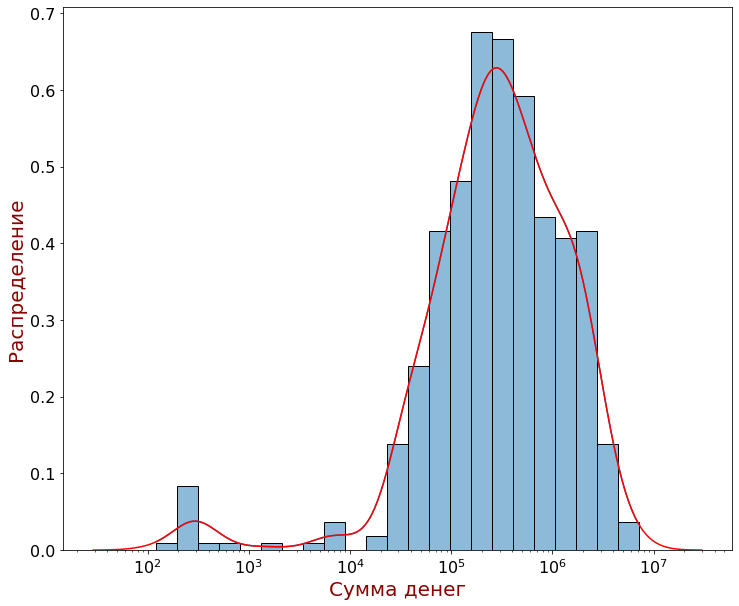

'Распределение более менее нормальное, с преобразованиями можно не колдовать'

In [201]:
"""смотрим распределена величина по сумме"""
font = {
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.figure(figsize=(12,10))
plt.xlabel("Сумма денег", fontdict=font)
plt.ylabel("Распределение", fontdict=font)
plt.xticks(size=16)
plt.yticks(size=16)

sns.histplot(df1['cash'],log_scale=10,stat='density',kde=True)
sns.kdeplot(df1['cash'], color='red')
plt.show()
"""Распределение более менее нормальное, с преобразованиями можно не колдовать"""
#коперник ушел, но костра бояться стоит

In [202]:
"""страховочная колонка"""
df1['cash1']=df1['cash']
df1['cash1']

date
2018-01-09     623133
2018-01-10     418928
2018-01-11    1376941
2018-01-12    1013307
2018-01-13     338822
               ...   
2019-12-24     665700
2019-12-25     638210
2019-12-26     451750
2019-12-27     633268
2019-12-28     240645
Name: cash1, Length: 522, dtype: int32

In [203]:
"""Смотрим на инфо данные нашего датасета"""
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 2018-01-09 to 2019-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cash    522 non-null    int32
 1   cash1   522 non-null    int32
dtypes: int32(2)
memory usage: 24.3+ KB


In [204]:
"""Попытка №1
Поскольку фич мало, делаем набор фич из даты и делаем бустинг,
так казать тестовый проход"""

'Попытка №1\nПоскольку фич мало, делаем набор фич из даты и делаем бустинг,\nтак казать тестовый проход'

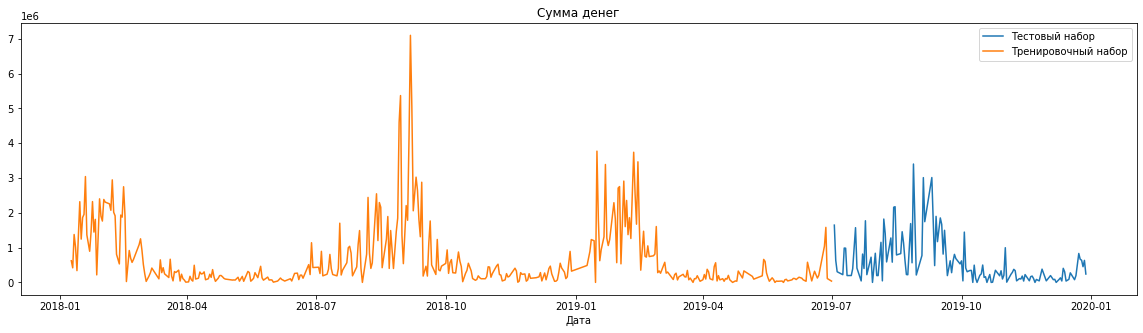

In [205]:
"""Делим на 2 части - на тренировочные и на тестовые
в соотношении по пороговой дате split_date.
По хорошему надо делить на тренировочные , валидационные и тестовые
для улучшения качества прогноза,
но данных мало :("""
cash = df1[['cash1']]
split_date = '2019-07-01' # пороговая дата
cash_train = cash.loc[cash.index <= pd.to_datetime(split_date)].copy()
cash_test = cash.loc[cash.index > pd.to_datetime(split_date)].copy()
_ = cash_test.rename(columns={'cash1': 'Тестовый набор'})\
    .join(cash_train.rename(columns={'cash1': 'Тренировочный набор'}),how='outer') \
    .plot.line(figsize=(20,5), title='Сумма денег')
plt.xlabel("Дата")
plt.show()

In [206]:
"""Строим фичи из даты разбивая пандавскими штуками на годы, месяцы и т.д."""

def create_feature(df, label=None):
    """
    Строит фичи из даты
    """
    df['date'] = pd.to_datetime(df.index)
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X_train, y_train = create_feature(cash_train, label='cash1')
X_test, y_test = create_feature(cash_test, label='cash1')

In [207]:
"""Строим модельку XGBRegressor  с количеством деревьев 100 в случайном лесу,
 посмотрим на пустую модель, прежде чем мучаться с подбором параметров."""
# Иконы нет, попа  с дымящей кастрюлей тоже, придется молиться без них,
# чтоб все было ок с первого раза
xgb_mod=xgb.XGBRegressor(n_estimators=100)
xgb_mod.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

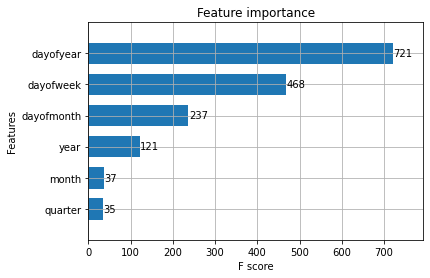

In [208]:
"""Смотрим, что для модели 'важно'"""
xgb.plot_importance(xgb_mod,height=0.7)


In [209]:
"""Предсказываем данные и соединяем в один датафрейм, чтобы построить графики"""
cash_test['Prediction'] = xgb_mod.predict(X_test)
temp_all = pd.concat([cash_test, cash_train], sort=False)

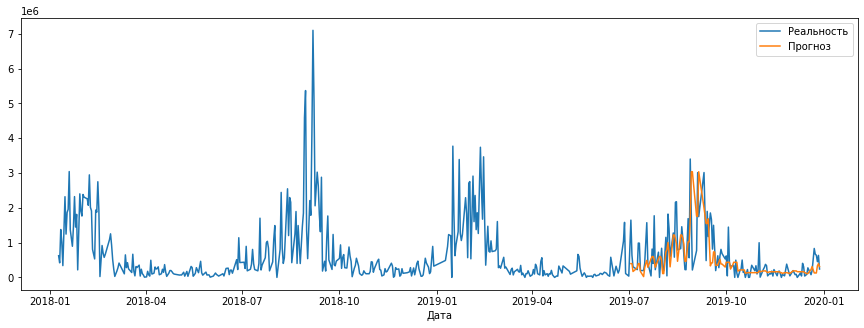

In [210]:
"""Рисуем график. По внешнему виду результаты впечатляющие."""
# Что скажет коэф детерминации?
temp_all[['cash1','Prediction']].plot(figsize=(15, 5))
plt.xlabel("Дата")
plt.legend(["Реальность","Прогноз"])
# мама сказала красиво получилось

In [211]:
"""смотрим результаты, по заданию нужно использовать коэффициент детерминации"""
# Почему, науке не известно
r2_score(cash_test['Prediction'],y_test)

"""Результат  далек от удовлетворительного,
подбор параметров вряд ли что то решит."""
# Хорошо что результат не отрицательный, спасибо и на этом

'Результат  далек от удовлетворительного,\nподбор параметров вряд ли что то решит.'

In [212]:
"""Попытка №2
Попробуем использовать сариму - это сезонная статистическая авторегрессионная модель"""
# Детям на ночь про нее не говорить
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y_train,
order=(1, 1, 1),
seasonal_order=(1, 1, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
"""Можно подобрать параметры и сезонность, если результаты будут удовлетворительны,
а пока посмотрим на 'пустую'."""
results = mod.fit()
results.summary().tables[1]

c:\users\karim\pycharmprojects\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\karim\pycharmprojects\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.2578,0.085,3.031,0.002,0.091,0.424
ma.L1,-0.7591,0.066,-11.424,0.000,-0.889,-0.629
ar.S.L12,0.0985,0.078,1.256,0.209,-0.055,0.252
ma.S.L12,-0.9617,0.037,-25.691,0.000,-1.035,-0.888
sigma2,7.669e+11,6.36e-14,1.21e+25,0.000,7.67e+11,7.67e+11


c:\users\karim\pycharmprojects\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


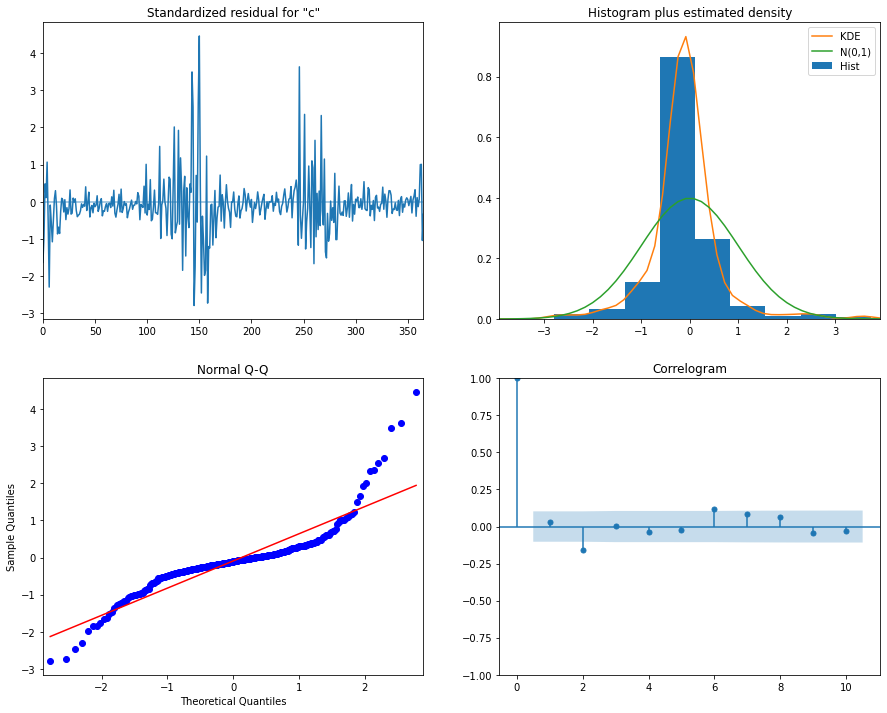

In [213]:
"""смотрим на распределения и результаты стат модели сарима"""
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [214]:
"""смотрим разброс предсказаний стат модели"""
pred = results.get_prediction(start=394,end=407)
pred_ci = pred.conf_int()
pred_ci

c:\users\karim\pycharmprojects\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,lower cash1,upper cash1
394,-1.515160e+06,2.320807e+06
395,-1.781295e+06,2.258865e+06
396,-1.474177e+06,2.727503e+06
397,-1.656608e+06,2.692894e+06
398,-1.636142e+06,2.854424e+06
399,-1.797066e+06,2.829793e+06
400,-1.888439e+06,2.870693e+06
401,-1.858490e+06,3.029307e+06
402,-1.749391e+06,3.263763e+06
403,-2.016072e+06,3.119378e+06


In [215]:
"""смотрим и понимаем, что стат модель слабовата,
она не особо гибкая, результат хуже чем у первого способа"""
r2_score(y_test.loc[y_test.index <= pd.to_datetime("2019-07-23")],
         pred.predicted_mean)
#оценка далека от 1, как говорил один персонаж,"маловато будет" :(

-0.3770499996131875

In [216]:
"""Попытка №3
Поскольку предыдущие методы не показали удов результатов,
будем использовать следущий метод - 'шифтование' - он используется в нейросетях для
работы с временными рядами и с моделями по прогнозированию валют"""

"Попытка №3\nПоскольку предыдущие методы не показали удов результатов,\nбудем использовать следущий метод - 'шифтование' - он используется в нейросетях для\nработы с временными рядами и с моделями по прогнозированию валют"

In [217]:
"""Если разброс будет слишком большой,
можно раскомментировать строку и сделать логарифмическое преобразование,
логарифм - медленно растущая функция, поэтому будет хороший вариант"""
# df1['cash']=np.log10(1+df1['cash'])

'Если разброс будет слишком большой,\nможно раскомментировать строку и сделать логарифмическое преобразование,\nлогарифм - медленно растущая функция, поэтому будет хороший вариант'

In [218]:
"""Указываем количество дней, на которое делаем прогноз, по заданию у нас 14 дней"""
future_days=14
df1['cash1'].shift(future_days)

date
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-13         NaN
                ...   
2019-12-24     78853.0
2019-12-25     88905.0
2019-12-26       279.0
2019-12-27     83249.0
2019-12-28    132132.0
Name: cash1, Length: 522, dtype: float64

In [219]:
"""сшифтуем на это количество дней и создадим колонку
 сшифтуем - перенем на указанное количество дней - 14 """
df1['pred']=df1['cash'].shift(-future_days)
df1['pred']

date
2018-01-09    1446377.0
2018-01-10    1811591.0
2018-01-11     216767.0
2018-01-12    2401577.0
2018-01-13    1903012.0
                ...    
2019-12-24          NaN
2019-12-25          NaN
2019-12-26          NaN
2019-12-27          NaN
2019-12-28          NaN
Name: pred, Length: 522, dtype: float64

In [220]:
"""смотрим X`"""
X=np.array(df1['cash']).reshape(-1,1)[:-future_days]
pd.DataFrame(X).head(5) #знаю можно лучше отобразить, но мне так нравится

,0
0,623133
1,418928
2,1376941
3,1013307
4,338822


In [221]:
"""смотрим y`"""
y=np.array(df1['pred']).reshape(-1,1)[:-future_days]
pd.DataFrame(y).head(5) #знаю можно лучше отобразить, но мне так нравится

,0
0,1446377.0
1,1811591.0
2,216767.0
3,2401577.0
4,1903012.0


In [222]:
"""Делим на 2 части - на тренировочные и на тестовые
в соотношении тренировочнеы / тестовые = 75%/25%.
По хорошему надо делить на тренировочные , валидационные и тестовые
для улучшения качества прогноза"""
# но данных мало :(
X_shift_train,X_shift_test,y_shift_train,y_shift_test=train_test_split(
    X,y,test_size=0.25)

In [223]:
"""Строим  три модельки скелета(пустые)"""
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=21).fit(
    X_shift_train,y_shift_train)
xgb_shift=xgb.XGBRegressor(n_estimators=100).fit(
    X_shift_train,y_shift_train)
lr=LinearRegression().fit(
    X_shift_train,y_shift_train)

In [224]:
"""Делаем набор для проверки, аналогичным образом шифтуя ряд значений"""
x_future=df1['cash'][:-future_days]
x_future=x_future.tail(future_days)
x_future

date
2019-11-19    167128
2019-11-20    182369
2019-11-21    110390
2019-11-22       279
2019-11-23     85765
2019-11-25     44296
2019-11-27    381388
2019-11-30     44609
2019-12-03    196349
2019-12-05     78853
2019-12-06     88905
2019-12-07       279
2019-12-09     83249
2019-12-10    132132
Name: cash, dtype: int32

In [225]:
"""Строим предсказания  три модельки скелета(пустые) смотрим на результаты и выбиарем лучшую"""

'Строим предсказания  три модельки скелета(пустые) смотрим на результаты и выбиарем лучшую'

In [226]:
tree_pred=tree.predict(np.array(x_future).reshape(-1,1))
tree_pred

array([ 41154. , 405105. , 305200. , 363550. ,  42097. ,  44609. ,
        78351. , 208600.5, 731829. , 665700. , 638210. , 363550. ,
       633268. , 240645. ])

In [227]:
xgb_shift_pred=xgb_shift.predict(np.array(x_future).reshape(-1,1))
xgb_shift_pred

array([172447.11, 420643.34, 397105.25, 374288.84, 214470.58, 178550.48,
       160622.77, 178550.48, 716034.5 , 512251.94, 434718.5 , 374288.84,
       484027.53, 257183.12], dtype=float32)

In [228]:
lr_pred=lr.predict(np.array(x_future).reshape(-1,1))
lr_pred

array([[493109.75501836],
       [497930.24352042],
       [475164.41831933],
       [440338.04147724],
       [467375.91826269],
       [454259.92602518],
       [560876.82190711],
       [454358.92300052],
       [502351.89756273],
       [465189.76141431],
       [468369.05085875],
       [440338.04147724],
       [466580.14704878],
       [482041.07083634]])

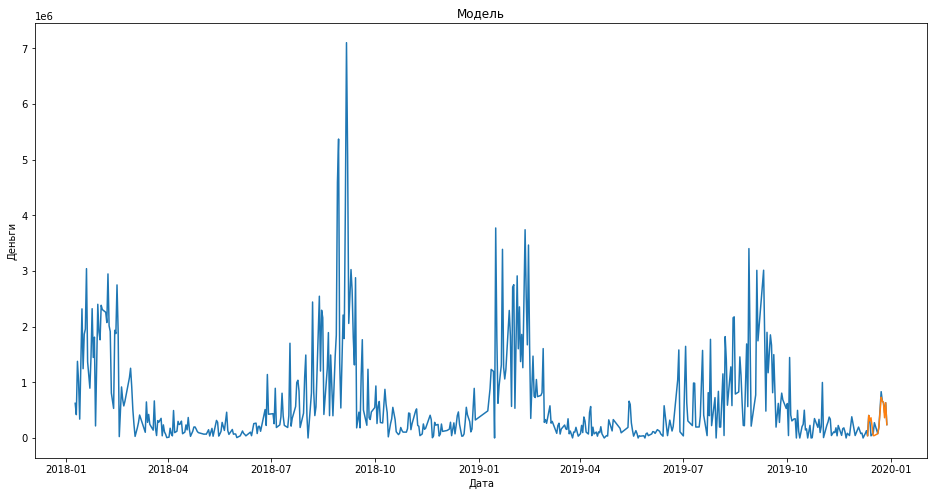

In [229]:
"""смотрим на результат"""
predictions=tree_pred #специально сделал несколько моделек, чтобы можно было поставить каждую и посмотреть
valid=pd.DataFrame(df1['cash'][X.shape[0]:])
valid['pred']=predictions
plt.figure(figsize=(16,8))
plt.title('Модель')
plt.xlabel('Дата')
plt.ylabel('Деньги')
plt.plot(df1['cash'])
plt.plot(valid['pred'])
plt.show()

In [230]:
"""Проверям результат"""
r2_score(valid['cash'],valid['pred'])
# Такой результат не стыдно людям показать

0.7983028249981994